In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.optimizers import Adam
import os
import shutil

import matplotlib.pyplot as plt


## Prepare huge dataset on disk instead of memory (RAM)

In [2]:
# Original dataset directory
original_dir = r'D:\Class\Deep Learning Class\datasets\dogs-vs-cats\train'

base_dir=r'D:\Class\Deep Learning Class\03- Load data and explore deep architectures\dogs-vs-cats'

# train dataset directory
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

# validation dataset directory
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

# test dataset directory
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)



In [3]:
# train directory for cats images
train_dir_cats = os.path.join(train_dir, 'cats')
os.makedirs(train_dir_cats, exist_ok=True)

# validarion directory for cats images
validarion_dir_cats = os.path.join(validation_dir, 'cats')
os.makedirs(validarion_dir_cats, exist_ok=True)

# test directory for cats images
test_dir_cats = os.path.join(test_dir, 'cats')
os.makedirs(test_dir_cats, exist_ok=True)


# train directory for dogs images
train_dir_dogs = os.path.join(train_dir, 'dogs')
os.makedirs(train_dir_dogs, exist_ok=True)

# validarion directory for cats images
validarion_dir_dogs = os.path.join(validation_dir, 'dogs')
os.makedirs(validarion_dir_dogs, exist_ok=True)

# test directory for cats images
test_dir_dogs = os.path.join(test_dir, 'dogs')
os.makedirs(test_dir_dogs, exist_ok=True)


### Cat image samples

In [4]:
# copy first 1000 cat images into train cats directory
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(train_dir_cats, fname)
    shutil.copyfile(src, dest)


# copy 1000 to 1500 cat images into validation cats directory
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(validarion_dir_cats, fname)
    shutil.copyfile(src, dest)


# copy 1500 to 2000 cat images into test cats directory
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(test_dir_cats, fname)
    shutil.copyfile(src, dest)

### Dog images samples

In [5]:
# copy first 1000 cat images into train cats directory
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(train_dir_dogs, fname)
    shutil.copyfile(src, dest)


# copy 1000 to 1500 cat images into validation cats directory
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(validarion_dir_dogs, fname)
    shutil.copyfile(src, dest)


# copy 1500 to 2000 cat images into test cats directory
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in  fnames :
    src = os.path.join(original_dir, fname)
    dest = os.path.join(test_dir_dogs, fname)
    shutil.copyfile(src, dest)

### validate fetch operation

In [6]:
print('total training cat images: ', len(os.listdir(train_dir_cats)))
print('total validation cat images: ', len(os.listdir(validarion_dir_cats)))
print('total test cat images: ', len(os.listdir(test_dir_cats)))

print()

print('total training dog images: ', len(os.listdir(train_dir_dogs)))
print('total validation dog images: ', len(os.listdir(validarion_dir_dogs)))
print('total test dog images: ', len(os.listdir(test_dir_dogs)))



total training cat images:  1000
total validation cat images:  1000
total test cat images:  500

total training dog images:  1000
total validation dog images:  500
total test dog images:  500


## Batch data load

In [7]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary'
                                                     # class_mode='categorical'
                                                    )
    
validation_generator = test_data_gen.flow_from_directory(directory=validation_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')
    


Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [9]:
for data_batch, label_batch in train_generator:
    print('data  batch shape', data_batch.shape)
    print('label batch shape', label_batch.shape)
    break

data  batch shape (20, 150, 150, 3)
label batch shape (20,)


In [10]:
# data, lbl =  next(train_generator)

In [11]:
label_batch.shape

(20,)

In [12]:
label_batch[2]

0.0

Text(0.5, 1.0, '0.0')

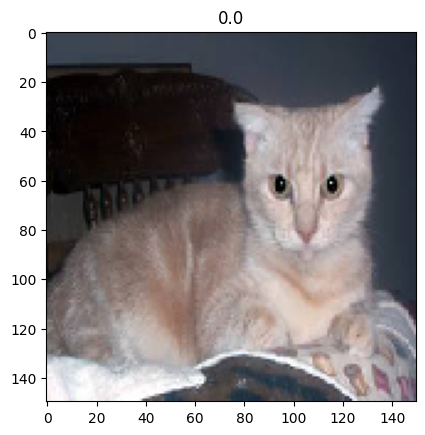

In [13]:
plt.imshow(data_batch[14])
plt.title(label_batch[14])

In [14]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

## Model

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [18]:
%%time

history = model.fit(train_generator,
                   epochs=50,
                   validation_data=validation_generator)

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 435ms/step - acc: 0.4790 - loss: 0.7746 - val_acc: 0.3333 - val_loss: 0.7693
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 334ms/step - acc: 0.5444 - loss: 0.6880 - val_acc: 0.6847 - val_loss: 0.6280
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - acc: 0.5855 - loss: 0.6679 - val_acc: 0.7040 - val_loss: 0.6113
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - acc: 0.6385 - loss: 0.6510 - val_acc: 0.6700 - val_loss: 0.6200
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - acc: 0.6866 - loss: 0.6052 - val_acc: 0.7220 - val_loss: 0.5740
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - acc: 0.7314 - loss: 0.5408 - val_acc: 0.7267 - val_loss: 0.5593
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - acc: 0.7609 - loss: 0.5029 - val_acc: 0.6800 - val_loss: 0.6042
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - acc: 0.7576 - loss: 0.4719 - val_acc: 0.4893 - val_loss: 1.0896
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s

In [19]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

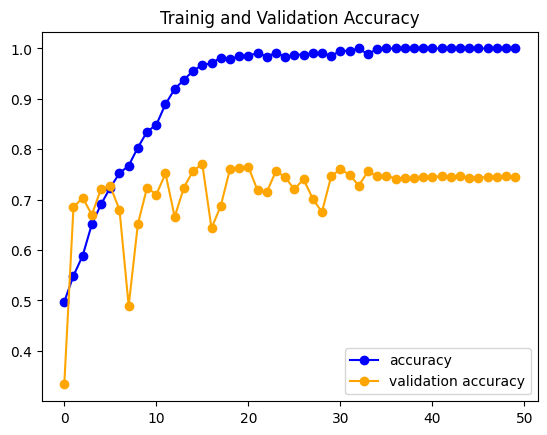

In [20]:
plt.plot(history.history['acc'], marker='o', color='blue',label='accuracy')
plt.plot(history.history['val_acc'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')

plt.legend()

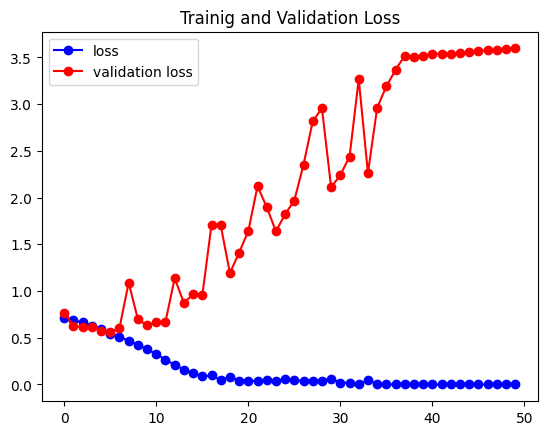

In [21]:
plt.plot(history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Loss')

plt.legend()